The goal is to do binary classification on the make_moons dataset from sklearn.

It is utilized a neural nerwork based on relu and sigmoid activation functions

In [5]:
from mlswarm.mlswarm import neuralnet 

#DATASET-------------------------------
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X, Y = make_moons(n_samples = 2000, noise=0.2, random_state=100)
Y = Y.reshape((Y.shape[0],1))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

In [6]:
nn_architecture = [
    {"input_dim": 2, "output_dim": 5, "activation": "relu"},
    {"input_dim": 5, "output_dim": 10, "activation": "relu"},
    {"input_dim": 10, "output_dim": 5, "activation": "relu"},
    {"input_dim": 5, "output_dim": 1, "activation": "sigmoid"},
]

#CREATE NEURAL NETWORK
nn = neuralnet(nn_architecture)

#INITIALIZE CLOUD WITH 150 PARTICLES ACCORDING TO XAVIER INITIALIZATION
nn.init_cloud(N = 150)

#Start training using default parameters
nn.train(X_train, Y_train, {'cost_type': 'rmse',
                            'algorithm': 'euler',
                            'max_epochs': 1000,
                            'kernel_a': 0.01,
                            'lerning_rate': 0.1,
                            'alpha_rate': 1,
                            'verbose': True})

Finding kernel constant...
Kernel constant found: 0.005

Training started...
Iteration: 00000 - Cloud mean cost: 0.69608 - Cloud variance: 0.46757
Iteration: 00001 - Cloud mean cost: 0.69639 - Cloud variance: 0.47691
Iteration: 00002 - Cloud mean cost: 0.69679 - Cloud variance: 0.48628
Iteration: 00003 - Cloud mean cost: 0.69723 - Cloud variance: 0.49570
Iteration: 00004 - Cloud mean cost: 0.69775 - Cloud variance: 0.50515
Iteration: 00005 - Cloud mean cost: 0.69832 - Cloud variance: 0.51465
Iteration: 00006 - Cloud mean cost: 0.69892 - Cloud variance: 0.52419
Iteration: 00007 - Cloud mean cost: 0.69953 - Cloud variance: 0.53377
Iteration: 00008 - Cloud mean cost: 0.70014 - Cloud variance: 0.54339
Iteration: 00009 - Cloud mean cost: 0.70077 - Cloud variance: 0.55307
Iteration: 00010 - Cloud mean cost: 0.70139 - Cloud variance: 0.56279
Iteration: 00011 - Cloud mean cost: 0.70198 - Cloud variance: 0.57255
Iteration: 00012 - Cloud mean cost: 0.70257 - Cloud variance: 0.58237
Iteration: 00

KeyboardInterrupt: 

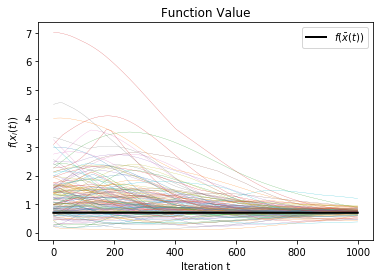

Test set accuracy using neuralnet 0: 0.48500


IndexError: tuple index out of range

In [3]:
#PLOT COST HISTORY
nn.plot_cost_history()

#ACCURACY ON TEST SET USING PARTICLE 0 WEIGHTS
nn.prediction_accuracy_particle(X_test, Y_test, acc_type = "sigmoid_accuracy", particle = 0)

#ACCURACY ON TEST SET USING CLOUD MEAN WEIGHTS
nn.prediction_accuracy_best_particle(X_test, Y_test, acc_type = "sigmoid_accuracy")

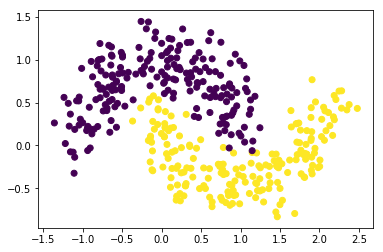

In [14]:
import matplotlib.pyplot as plt
from mlswarm.utils import convert_prob_into_class
%matplotlib inline 

#CLASSIFICATION VISUALIZED
Y_test_hat = nn.forward_propagation(X_test, cloud = nn.cloud_mean)
plt.scatter(X_test[:,0],X_test[:,1], c = convert_prob_into_class(Y_test_hat).flatten())